## Grid granularity tuning

In [26]:
%matplotlib notebook
import matplotlib
import numpy as np
import pickle
import os.path as osp
from cycler import cycler
from config import SAVE_DIR
from matplotlib import pyplot as plt
from acoc import acoc_plotter as plotter

<IPython.core.display.Javascript object>


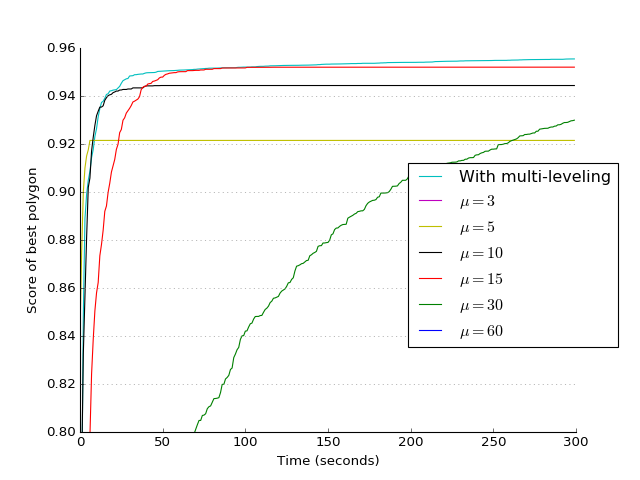

In [27]:
data = pickle.load(open(osp.join(SAVE_DIR, '02.19, multileveling server/results.pickle'), 'rb'))

data = np.array(data)
data = data.T[0:300].T
x = range(data.shape[1])

labels = [
          'With multi-leveling', 
          r'$\mu = 3$',
          r'$\mu = 5$', 
          r'$\mu = 10$', 
          r'$\mu = 15$',
          r'$\mu = 30$',
          r'$\mu = 60$'
         ]
fig, ax = plt.subplots()

plotter.hide_top_and_right_axis(ax)
ax.yaxis.grid(color='gray')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Score of best polygon')
ax.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k', 'r', 'g', 'b']))
ax.set_ylim([0.80,0.96])

for i in range(data.shape[0]):
    plt.plot(x, data[i], label=labels[i])
    
#lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)
lgd = plt.legend(labels, loc='center right', bbox_to_anchor=(1.1, 0.46))
plt.show()

In [23]:
np.amax(data, axis=1)

array([ 0.95544677,  0.73567234,  0.92148926,  0.94436541,  0.95201805,
        0.92993026,  0.69073188])

<IPython.core.display.Javascript object>


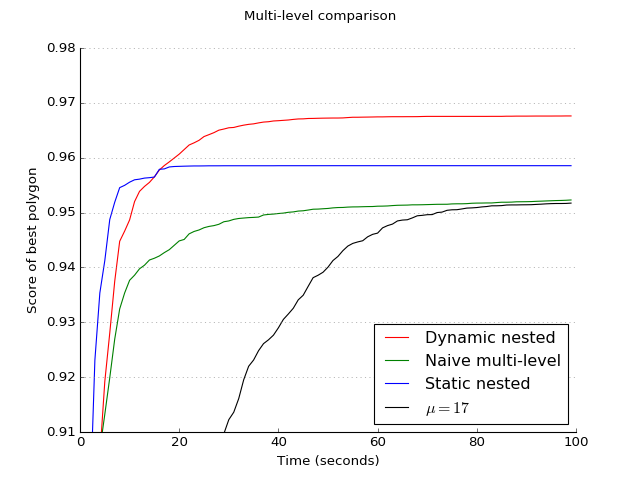

In [28]:
nested_static = pickle.load(open(osp.join(SAVE_DIR, '02.24, multilevel med nest grid/results.pickle'), 'rb'))
data = pickle.load(open(osp.join(SAVE_DIR, '02.24, multilevel med nest grid/run2/results.pickle'), 'rb'))

data = np.concatenate((np.array(data), np.array(nested_static)[1:3]))
x = range(data.shape[1])

labels = [
          'Dynamic nested',
          'Naive multi-level',
          'Static nested',
          r'$\mu = 17$'
         ]
fig, ax = plt.subplots()

plotter.hide_top_and_right_axis(ax)
fig.suptitle("Multi-level comparison")
ax.yaxis.grid(color='gray')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Score of best polygon')
ax.set_prop_cycle(cycler('color', ['r', 'g', 'b', 'k']))

ax.set_ylim([0.91,0.98])

for i in range(data.shape[0]):
    plt.plot(x, data[i], label=labels[i])
    
lgd = plt.legend(labels, loc='lower right')
plt.show()

In [25]:
print("Final max values: {}".format(np.amax(data, axis=1)))
seconds = 20
print("Scores after {} seconds: {}".format(seconds, data[:,seconds]))

Final max values: [ 0.96761457  0.95229657  0.95854693  0.95172687]
Scores after 20 seconds: [ 0.96065274  0.94483328  0.95842664  0.88075118]
